# Adaboost

In [1]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

plt.figure(figsize=(8, 8))
X, y = make_classification(n_samples = 1000, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

In [40]:
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples = 3000, n_features=10, n_redundant=0, n_informative=10, n_clusters_per_class=1, n_classes=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [55]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

accuracy_history = []

for i in range(1, 20):
    tree = DecisionTreeClassifier(max_depth = i)
    model_ada = AdaBoostClassifier(base_estimator=tree, n_estimators=100)
    model_ada.fit(X_train, y_train)
    y_pred = model_ada.predict(X_test)
    accuracy_history.append(accuracy_score(y_test, y_pred))    


In [56]:
accuracy_history

[0.8466666666666667,
 0.8522222222222222,
 0.8922222222222222,
 0.9166666666666666,
 0.9311111111111111,
 0.9455555555555556,
 0.9555555555555556,
 0.9466666666666667,
 0.9422222222222222,
 0.9477777777777778,
 0.95,
 0.9533333333333334,
 0.9477777777777778,
 0.9522222222222222,
 0.9066666666666666,
 0.9033333333333333,
 0.8211111111111111,
 0.8166666666666667,
 0.8144444444444444]

In [57]:
plt.figure(figsize=(8, 4))
plt.plot(range(1,20), accuracy_history, marker='o', linestyle='solid', linewidth=2, markersize=5)
plt.grid(True)
plt.xticks(range(1,20))
plt.ylim((0.5,1))
plt.xlabel("Depth of weak-learner")
plt.ylabel("Accuracy Score")

plt.show()

# Stacking

In [58]:
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples = 3000, n_features=10, n_redundant=0, n_informative=10, n_clusters_per_class=1, n_classes=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [99]:
models = [('Logistic Regression',LogisticRegression()), 
          ('Nearest Neighbors',KNeighborsClassifier()), 
          ('Decision Tree',DecisionTreeClassifier()), 
          ('Support Vector Classifier',SVC()), 
          ('Naive Bayes',GaussianNB())]

In [100]:
accuracy_list = []

for model in models:
    model[1].fit(X_train, y_train)
    y_pred = model[1].predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))

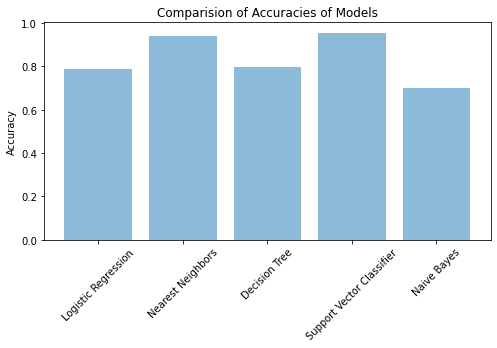

In [101]:
plt.figure(figsize=(8, 4))
model_names = [x[0] for x in models]
y_pos = range(len(models))
plt.bar(y_pos, accuracy_list, align='center', alpha=0.5)
plt.xticks(y_pos, [x[0] for x in models], rotation=45)
plt.ylabel('Accuracy')
plt.title('Comparision of Accuracies of Models')
plt.show()

In [88]:
from sklearn.ensemble import StackingClassifier
stacking_model = StackingClassifier(estimators=models, final_estimator=LogisticRegression(), cv=5)
stacking_model.fit(X_train, y_train)

C:\Users\Joshi008\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(cv=5,
                   estimators=[('Logistic Regression', LogisticRegression()),
                               ('Nearest Neighbors', KNeighborsClassifier()),
                               ('Decision Tree', DecisionTreeClassifier()),
                               ('Support Vector Classifier', SVC()),
                               ('Naive Bayes', GaussianNB())],
                   final_estimator=LogisticRegression())

In [89]:
y_pred = stacking_model.predict(X_test)

In [90]:
accuracy_score(y_test, y_pred)

0.9577777777777777

In [93]:
accuracy_list.append(accuracy_score(y_test, y_pred))
model_names = [x[0] for x in models]
model_names.append("Stacked Model")

In [96]:
plt.figure(figsize=(8, 4))
y_pos = range(len(model_names))
plt.bar(y_pos, accuracy_list, align='center', alpha=0.5)
plt.xticks(y_pos, model_names, rotation=45)
plt.ylabel('Accuracy')
plt.title('Comparision of Accuracies of Models')
plt.show()